In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv('sar_CPU_ALL.log', sep='\s+', skiprows=[0]) 
# Now sar_CPU_ALL.log is artificial, need more modifications for actual data.

Rename columns.

In [3]:
df.columns=["TIME", "CPU", "user", "nice", "system", "iowait", "steal", "idle"]

Exclude rows which column "CPU" is "all".

In [4]:
df = df[df["CPU"] != "all"]

In [5]:
df['num'] = [1 for i in range(len(df))]

%user heatmap of a particular moment
====

In [6]:
moment = '00:20:01'
snapshot_all_users = df[df.TIME == moment]['user']

In [15]:
# If the side_len is NOT expr(n), below procedure does not work properly..
side_len = int(math.sqrt(len(snapshot_all_users)))

In [16]:
snapshot_all_users_list = snapshot_all_users.reshape([side_len, side_len])

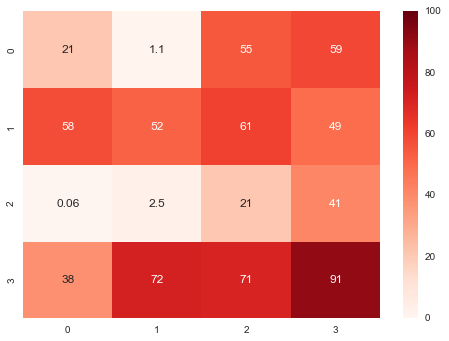

In [17]:
sns.heatmap(snapshot_all_users_list,
            cmap='Reds',
            annot=True, 
            vmin=0,
            vmax=100)

Time-series %user heatmap
====

In [18]:
df.user = df.user.apply(lambda x: np.round(x, -1))

In [23]:
df.head(5)

,TIME,CPU,user,nice,system,iowait,steal,idle,num
1,00:10:01,0,20.0,0.0,0.6,0.03,0.0,98.32,1
2,00:10:01,1,20.0,0.0,0.6,0.03,0.0,98.32,1
3,00:10:01,2,20.0,0.0,0.6,0.03,0.0,98.32,1
4,00:10:01,3,20.0,0.0,0.6,0.03,0.0,98.32,1
5,00:10:01,4,20.0,0.0,0.6,0.03,0.0,98.32,1


In [24]:
cpu_pivot = pd.pivot_table(data=df,values='num',
                          index='user',
                          columns='TIME',
                          aggfunc=sum)

In [25]:
cpu_pivot

TIME,00:10:01,00:20:01,00:30:01,00:40:01,00:50:02,01:00:01
user,,,,,,
0.0,NaN,3.0,NaN,NaN,NaN,NaN
20.0,8.0,2.0,NaN,NaN,2.0,NaN
30.0,3.0,NaN,NaN,8.0,NaN,9.0
40.0,5.0,2.0,7.0,6.0,NaN,4.0
50.0,NaN,2.0,3.0,1.0,NaN,NaN
60.0,NaN,4.0,6.0,NaN,NaN,NaN
70.0,NaN,2.0,NaN,2.0,NaN,NaN
90.0,NaN,1.0,NaN,NaN,NaN,NaN


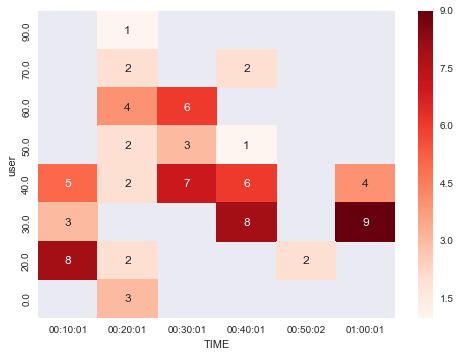

In [27]:
ax = sns.heatmap(cpu_pivot,annot=True, fmt='g', cmap='Reds')
ax.invert_yaxis()